In [1]:
import numpy as np
import pandas as pd

In [2]:
car_df = pd.read_csv('data/data.csv')

In [3]:
car_df.columns = car_df.columns.str.lower().str.replace(' ', '_')

Заменяем значение в столбцах: все с маленькой буквы и без пробеллов

In [4]:
car_df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
str_name = list(car_df.dtypes[car_df.dtypes == 'object'].index)
str_name

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

создали список всех колонок со строковыми параметрами, ниже идет замена как с колонками

In [6]:
for name in str_name:
    car_df[name] = car_df[name].str.lower().str.replace(' ', '_')

In [7]:
car_df.tail()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920
11913,lincoln,zephyr,2006,regular_unleaded,221.0,6.0,automatic,front_wheel_drive,4.0,luxury,midsize,sedan,26,17,61,28995


In [8]:
names = list(car_df.dtypes.index)
for name in names:
    print(name)
    print(car_df[name].unique()[:5])
    print(car_df[name].nunique())
    print('\n')

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48


model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914


year
[2011 2012 2013 1992 1993]
28


engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10


engine_hp
[335. 300. 230. 320. 172.]
356


engine_cylinders
[ 6.  4.  5.  8. 12.]
9


transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5


driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4


number_of_doors
[ 2.  4.  3. nan]
3


market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71


vehicle_size
['compact' 'midsize' 'large']
3


vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16


highway_mpg
[26 28 27 25 24]
59


city_mpg
[19 20 18 17 16]
69


popularity
[3916 3105  819  617 1013]
48


msrp
[46135 40650 

краткий срез по таблице: кол-во уникальных значений, какие в принципе бывают значения

In [9]:
import matplotlib as mlp
import seaborn as sns

<AxesSubplot:xlabel='msrp', ylabel='Count'>

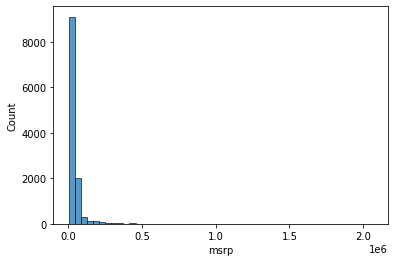

In [10]:
sns.histplot(car_df.msrp, bins=50 )

In [11]:
price_log = np.log1p(car_df.msrp)

два графика для одного и того же параметра, применяем функцию лог + 1 чтобы избавиться от длинного хвоста

<AxesSubplot:xlabel='msrp', ylabel='Count'>

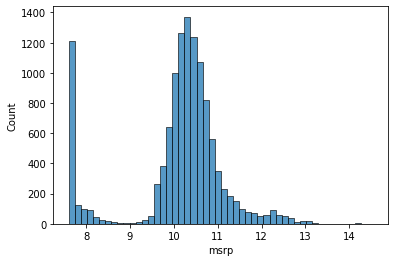

In [12]:
sns.histplot(price_log, bins=50)

In [13]:
car_df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

проверка значений таблицы на заполненность, обязательно учесть nan при использовании данных, конец первого урока

## Урок 2

In [14]:
n = len(car_df)
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val
n_test, n_val, n_train

(2382, 2382, 7150)

разбиваем датасет на три части для обучения модели, теста и валидации данных

In [15]:
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)
idx

array([2735, 6720, 5878, ..., 6637, 2575, 7336])

перемешиваем индексы исходного датасета, ставим рандом сид для сохранения рандомного распределения дальше

In [16]:
car_train = car_df.iloc[idx[:n_train]]
car_test = car_df.iloc[idx[n_train:n_train+n_test]]
car_val = car_df.iloc[idx[n_train+n_test:]]

расчленяем датасет на три копии

In [17]:
len(car_test), len(car_val), len(car_train)

(2382, 2382, 7150)

In [18]:
car_train = car_train.reset_index(drop=True)
car_test = car_test.reset_index(drop=True)
car_val = car_val.reset_index(drop=True)

меняем индексы на индексы по порядку без сохранения исходных (для сохранения исходных убираем дроп)

In [19]:
y_train = np.log1p(car_train.msrp.values)
y_test = np.log1p(car_test.msrp.values)
y_val = np.log1p(car_val.msrp.values)

In [20]:
del car_train['msrp']
del car_test['msrp']
del car_val['msrp']

создаем листы значений с ценой, на которых будем тренироваться, удаляем столбец со значениями из общего списка, чтобы не натренирвоать нашу модель с исходными данными.))))

## Урок 3

In [21]:
w = [0.01, 0.04, 0.002]
w0 = 7.17

In [22]:
xi = [453, 11, 86]

In [23]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    for i in range(n):
        res = res + xi[i] * w[i]
    return res
    

In [24]:
w = [w0] + w

In [25]:
def lineral_regr(xi, w):
    xi = [1] + xi
    return dot(xi, w)

In [26]:
lineral_regr(xi, w)

12.312

Линейная регрессия сводится к перемножению матрицы данных на вектор весов, НО мы не знаем заранее вектор весов.))))

In [27]:
X = [
    [148, 24, 3058],
    [452, 11, 86],
    [149, 47, 201],
    [14, 25, 300],
    [43, 12, 82],
    [144, 46, 254],
    [147, 54, 2458],
    [459, 21, 99],
    [142, 47, 204],
    ]
X = np.array(X)
y = [124, 258, 1200, 58, 456, 123, 57, 896, 1356]

Поэтому мы берем данный и путем математических вычислений изменяем формулу, чтобы с имеющимися реальными ценами и реальными признаками найти максимально близко подходящие веса. Чтобы найти вес нужно из матрицы данных сделать квадратную матрицу (домножив ее на себя транспонированную), затем инвертируем получившуюся матрицу. После этого домножаем на транспонированную исходную матрицу и вектор с результатами.

Выглядит страшно, но это нужно, чтобы из формулы X*w = y перенести Х в правую часть выражения и найти неизвестные веса.)

In [28]:
def train_lineral(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    X_i = np.linalg.inv(XTX)
    w_full = X_i.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [29]:
train_lineral(X, y)

(138.25892429730723, array([ 0.67147003, 12.79253939, -0.22663086]))

## Урок 4

In [30]:
car_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [31]:
base_feat = ['engine_hp',
       'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

In [32]:
def prepare_data(df):
    df_prep = df[base_feat]
    df_prep = df_prep.fillna(0)
    data = df_prep.values
    return data

In [33]:
X_train = prepare_data(car_train)
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [34]:
w0, w = train_lineral(X_train, y_train)

In [35]:
y_pred = w0 + X_train.dot(w)

<AxesSubplot:ylabel='Count'>

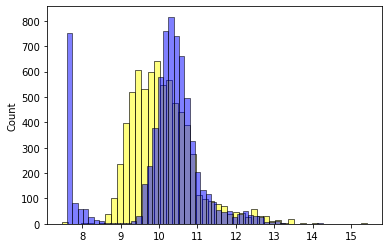

In [36]:
sns.histplot(y_pred, bins=50, alpha=0.5, color='yellow')
sns.histplot(y_train, bins=50, alpha=0.5, color='blue')

Взяли из наших данных 5 числовых параметров, сделали из них матрицу и функцией линейной регрессии получили какие-то результаты. Как видно по графику, наши желтые результаты не совсем дотягивают до имеющихся.

In [37]:
def rmse(y_train, y_pred):
    error = y_train - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

Root mean square error - средняя квадратичная ошибка - среднее значение разницы между нашим предсказанием и реальным значением (возводим в квалрат, чтобы избавиться рот минуса, берем корень, чтобы вернуться к реальным значениям)

In [38]:
rmse(y_train, y_pred)

0.7554192603920132

стандартная квадратичная ошибка для тренировочных данных

In [39]:
X_val = prepare_data(car_val)
y_pred = w0 + X_val.dot(w)
y_pred
rmse(y_val, y_pred)

0.7359130757318697

Стандартная квадратичная ошибка для данных валидации. Расхождения небольшие, НО сами ошибки огромные, поэтому данные с исходными несовпадают. Добавим в функцию подготовки даты еще один признак - возраст машины

In [40]:
def prepare_data(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base_feat + ['age']
    df_prep = df[features]
    df_prep = df_prep.fillna(0)
    data = df_prep.values
    return data

In [41]:
X_train = prepare_data(car_train)
w0, w = train_lineral(X_train, y_train)

X_val = prepare_data(car_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5149229218585313

Заметь, мы не используем функцию train_lineral на данных валидации, мы подставляем полученные веса к данным валидации, чтобы все по-честному.))) С новым полем получили лучшее значение среднеквадратичной ошибки, теперь график выглядит более повторяющим форму исходных данных

<AxesSubplot:ylabel='Count'>

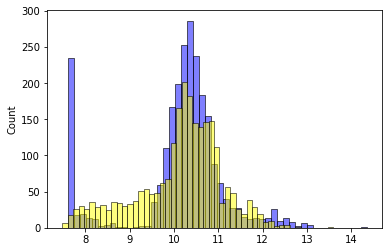

In [42]:
sns.histplot(y_val, bins=50, alpha=0.5, color='blue')
sns.histplot(y_pred, bins=50, alpha=0.5, color='yellow')

In [43]:
def prepare_data(df):
    df = df.copy()
    df['age'] = 2017 - df.year
    features = base_feat + ['age']
    for v in [2, 3, 4]:
        df['car_doors_%s' %v] = (df.number_of_doors == v).astype('int')
        features.append('car_doors_%s' %v)
    df_prep = df[features]
    df_prep = df_prep.fillna(0)
    data = df_prep.values
    return data

Пример добавления категориальных данных в данные для тренировки модели. Можно добавить хоть все, но лучше выбирать знаковые, чтобы не перегрузить себя + от добавления всех подряд признаков среднеквадратичная ошибка отклонения может и не стать разительно меньше.

In [44]:
X_train = prepare_data(car_train)
w0, w = train_lineral(X_train, y_train)

X_val = prepare_data(car_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.513381917283316

## Урок 4. Регуляризация

Когда значение матрицы в столбцах идентичное, у нас сбиваются все настройки весов (и даже может вылезти неприятная ошибка взятия инвертированной матрицы.
Такая матрица выглядит так a = [1, 3 , 24,
                                2, 3, 24,
                                47, 3, 24,]
Чтобы избежать ошибок, мы по главной диагонали добавляем какое-то число r (от маленького, до юольшого, в зависимости от параметра нашей среднеквадратичной ошибки).

In [51]:
def train_lineral_with_reg(X, y, r=0.1):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    X_i = np.linalg.inv(XTX)
    w_full = X_i.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [54]:
X_train = prepare_data(car_train)
w0, w = train_lineral_with_reg(X_train, y_train, 0.0001)

X_val = prepare_data(car_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5133819100524345

In [57]:
car_full_train = pd.concat([car_train, car_test])

In [59]:
car_full_train = car_full_train.reset_index(drop=True)

In [60]:
y_full_train = np.concatenate([y_train, y_test])

In [64]:
X_full_train = prepare_data(car_full_train)
wo, w = train_lineral_with_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_data(car_test)
y_pred = w0 + X_test.dot(w)

rmse(y_test, y_pred)

0.5178360109328967

In [80]:
car_one = car_test.iloc[22].to_dict()
car_small = pd.DataFrame([car_one])

In [81]:
X_small = prepare_data(car_small)
y_pred = w0 + X_small.dot(w)
y_pred[0]

10.017091564605975

In [82]:
np.expm1(y_pred[0])

22405.16816857968

In [83]:
np.expm1(y_test[22])

24044.999999999993